In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customerdf = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
customerdf_copy = customerdf.copy()
customerdf_copy.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


# Data Cleaning

In [4]:
#There are no null values present in the data
customerdf_copy.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

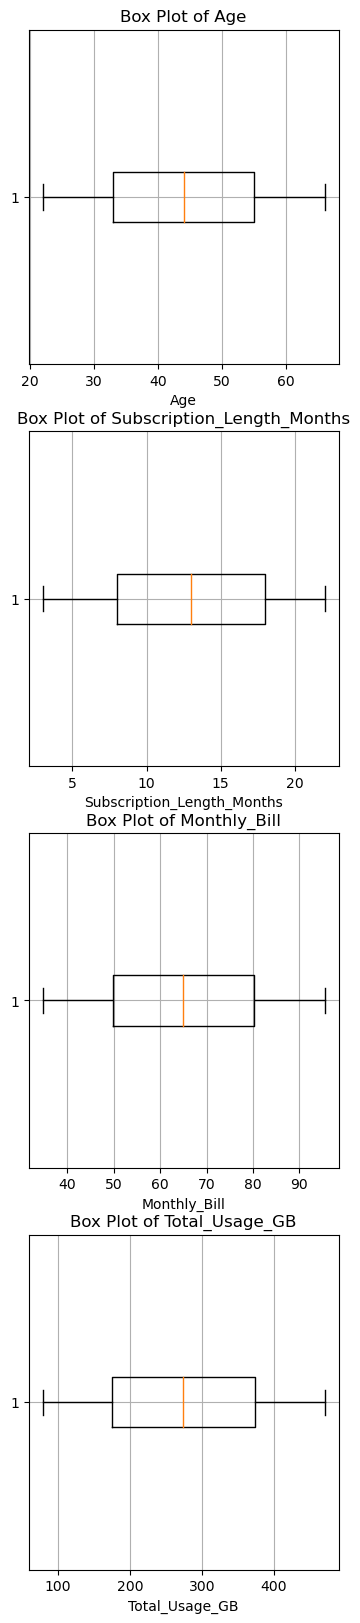

In [41]:
# Checking for Boxplot that if there is any plot that is not evenly distributed
#There can be outliers in Age,subscription_column , monthly_bill , total_usage_GB


columns_to_plot = ['Age', 'Subscription_Length_Months', 'Monthly_Bill','Total_Usage_GB']
# Define the number of rows and columns for subplots
num_rows = len(columns_to_plot)
num_cols = 1 # You can adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4, 5*num_rows))

# Plot each column as a box plot in its own subplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(customerdf_copy[col], vert=False)  # vert=False makes it horizontal
    ax.set_xlabel(col)
    ax.set_title(f'Box Plot of {col}')
    ax.grid(True)
plt.savefig('BoxPlot.pdf', format='pdf')
# Show the subplots
plt.show()


### As we can see the from above graph that data is evenly distributed hence chances being an outliers in data are very rare but still trying to remove outliers if any by lowering the zscore_threshold to make deviation sensitivity high.

In [20]:
from scipy import stats

def remove_outliers_zscore(df, columns, z_threshold=1.5):
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column]))
        df = df[(z_scores < z_threshold)]
    return df

# Specify the columns you want to remove outliers from
columns_to_remove_outliers = ['Age', 'Subscription_Length_Months', 'Monthly_Bill','Total_Usage_GB']

# Call the function to remove outliers
customerdf_copy = remove_outliers_zscore(customerdf_copy, columns_to_remove_outliers)

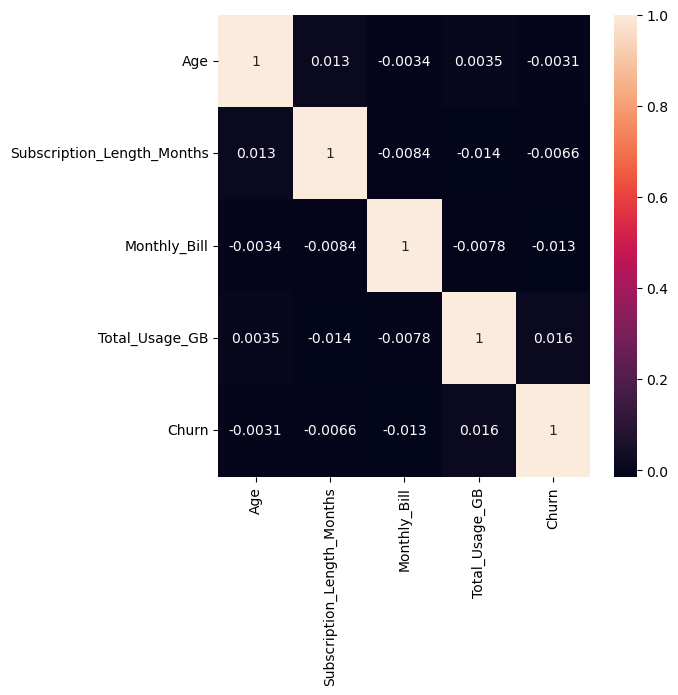

In [42]:
# Correlation matrix on first few records to take a glance at dependencies

corr_mat = customerdf_copy[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']]
corr_mat = corr_mat.iloc[:10000]
corr_mat = corr_mat.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_mat, annot=True)
plt.savefig('HeatMap.pdf', format='pdf')
plt.show()

# From above graph above none of the columns are highly correlated hence we are good to go

# Data Modeling 

### Using Decision Tree to predict the churn, since the churn column has values either 0 or 1.

In [28]:
# Removing customerID,Name as they are irrelevant to the prediction that we will make

inputs = customerdf_copy.drop(['Churn','CustomerID','Name'],axis=1)
target = customerdf_copy['Churn']

In [29]:
#Label encoding the Gender and location

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the selected column
inputs['Gender'] = label_encoder.fit_transform(inputs['Gender'])
inputs['Location'] = label_encoder.fit_transform(inputs['Location'])

# Normalizing 

### Since the Decision trees are not sensitive to scale of data we will not normalize the data

# Train test split

In [30]:


# Splitting the data into train and test set 

from sklearn.model_selection import train_test_split

train_input,test_input,train_output,test_output = train_test_split(inputs,target , test_size = 0.2,random_state = 10)


#  Decision tree

In [31]:
# Fitting the model on train input and train output

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini", max_depth = 4,splitter='random')
dtc.fit(train_input,train_output)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [32]:
# Predciting using our trained model on test dataset as well as train data set to ensure the model is not overfitting

ypred_train =  dtc.predict(train_input)
ypred_test = dtc.predict(test_input)

In [33]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(test_output, ypred_test)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(test_output, ypred_test)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(test_output, ypred_test)
print(f"Recall: {recall}")

# Calculate F1 Score
f1 = f1_score(test_output, ypred_test)
print(f"F1 Score: {f1}")

Accuracy: 0.5080811877466641
Precision: 0.5010438413361169
Recall: 0.22900763358778625
F1 Score: 0.31434184675834975


#  Random Forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the Random Forest model on the training data
rf_clf.fit(train_input,train_output)

# Make predictions with the Random Forest model
y_rf_pred = rf_clf.predict(test_input)

In [35]:
#Calculating the performance of Random forest classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(test_output, y_rf_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(test_output, y_rf_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(test_output, y_rf_pred)
print(f"Recall: {recall}")

# Calculate F1 Score
f1 = f1_score(test_output, y_rf_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.5036647246758128
Precision: 0.49269311064718163
Recall: 0.27022900763358776
F1 Score: 0.3490263741681045


# Creating a sample data to predict the Churn

In [38]:
new_pred = pd.DataFrame({'Age':[20,30],'Gender':[1,2],'Location':[2,4],'Subscription_Length_Months':[11,18],'Monthly_Bill':[90,80],'Total_Usage_GB':[200,100]})
my_prediciton = rf_clf.predict(new_pred)
new_pred['Predicted Value'] = my_prediciton
new_pred

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Predicted Value
0,20,1,2,11,90,200,0
1,30,2,4,18,80,100,1


# Conclusion

### Both Random Forest classifier and Decision tree have almost same accuracy and can predict accurately 1 of 2 input data correctly